# <center>LAB5 tutorial for Machine Learning <br > Decision Trees and Random Forests</center>

> The document description are designed by JIa Yanhong in 2022. Sept. 30th

## Objective

- Master the  Decision Tree algorithm.
- 
- Complete the LAB assignment and submit it to BB.

## 1. Decision Tree Algorithm
### Introduction
Decision tree builds classification or regression models in the form of a tree structure.It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with `decision nodes` and `leaf nodes`. 

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where `internal nodes` represent `the features` of a dataset, `branches` represent the `decision rules` and each `leaf node `represents the `outcome`.

<img src="images/decision-tree-classification-algorithm.png" alt="Decision Tree Classification Algorithm " style="zoom:100%;" />
<img src="images/Decision_Tree_1.png" alt="img  " style="zoom:100%;" />


- A decision node  (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy).
- A leaf node (e.g., Play) represents a classification or decision. 
- The topmost decision node in a tree which corresponds to the best predictor called `root node`. 
Decision trees can handle both categorical and numerical data. 

### How does the Decision Tree Algorithm Work?

The basic idea behind any decision tree algorithm is as follows:
1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until one of the condition will match:
   - All the tuples belong to the same attribute value.
   - There are no more remaining attributes.
   - There are no more instances.

![How does the Decision Tree Algorithm Work?](images/2_btay8n.png)

### Attribute Selection Measures
Attribute selection measure is a technique used for the selecting best attribute for discrimination among tuples. It gives rank to each attribute and the best attribute is selected as splitting criterion.

The most popular methods of selection are:

1. Entropy
2. Information Gain (`ID3`)
3. Gain Ratio (`ID4.5`)
4. Gini Index(`CART`)


#### Entropy
To understand information gain, we must first be familiar with the concept of entropy.. Entropy $E(S)$ is a measure of the amount of uncertainty in a dataset $S$.
$$Entropy(S)=E(S)=-\sum_{i=1}^{c}p_{i}log_{2}p_{i}$$

<img src="images/Entropy.png" alt="img  " style="zoom:100%;" />

The entropy is  0 if all samples of a node belong to the same class.
The entropy is maximal if we have a uniform class distribution. 
#### a) Entropy using the frequency table of one attribute:

 <img src="images/Entropy_3.png" alt="img  " style="zoom:100%;" />

 #### b) Entropy using the frequency table of two attributes: 
$$E(S,x)=\sum_{v=0}^{V}\frac{S_{v}}{S}E(S_{v})$$

Suppose there are V possible values of the feature or attribute $x$. 

 <img src="images/Entropy_2.png" alt="img   " style="zoom:105%;" />



#### Information Gain
The information gain (ID3 )is based on the decrease in entropy after a dataset is split on an attribute.
$$Gain(S,a)=E(S)-E(S,a)=E(S)-\sum_{v=0}^{V}\frac{S_{v}}{S}E(S_{v})$$
> Suppose there are V possible values of the feature or attribute $a$. 

Constructing a decision tree is all about finding attribute that returns the highest information gain.


| *Step 1*: Calculate entropy $E(S)$ of the target.                   |
| ------------------------------------------------------------ |
| <img src="images/Entropy_target.png" alt="img  " style="zoom:100%;" /> |
| *Step 2*: The dataset is then split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get total entropy for the split. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy. |
| <img src="images/Entropy_attributes.png" alt="img  " style="zoom:105%;" /> |
| $$Gain(S,a)=E(S)-E(S,a)=E(S)-\sum_{v=0}^{V}\frac{S_{v}}{S}E(S_{v})$$ <img src="images/Entropy_gain.png" alt="img " style="zoom:100%;" />  |
| *Step 3*: Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch. |
| <img src="images/Entropy_attribute_best.png" alt="img " style="zoom:100%;" /> |
| <img src="images/decision_tree_slices.png" alt="img " style="zoom:100%;" /> |
| *Step 4a*: A branch with entropy of 0 is a leaf node.        |
| ![img](images/Entropy_overcast.png)                          |
| *Step 4b*: A branch with entropy more than 0 needs further splitting. |
| ![img](images/Entropy_Sunny.png)                             |
| *Step 5*: The ID3 algorithm is run recursively on the non-leaf branches, until all data is classified. |
| ![img](images/Decision_rules.png)                            |

#### Gain Ratio
Information gain is biased for the attribute with many outcomes. It means it prefers the attribute with a large number of distinct values. For instance, consider an attribute with a unique identifier such as `customer_ID` has zero info(D) because of pure partition. This maximizes the information gain and creates useless partitioning. 

`The gain ratio` is the modification of information gain. It takes into account the number and size of branches when choosing an attribute. 
$$Gain_{ratio}(S,a)=\frac{Gain(S,a)}{E_{a}(S)}\\ E_{a}(S)=\sum_{v=1}^{V}\frac{ S_{v}}{S}log_{2}\frac{S_{v}}{S} $$


#### Gini index
Another decision tree algorithm CART (Classification and Regression Tree) uses the Gini method to create split points.
$$Gini(S)=1-\sum_{i=1}^{C}p_{i}^{2}\\
Gini(S,a)=\sum_{v=1}^{V}\frac{S_{v}}{S}Gini(S_{v}) $$
Gini impurity is more computationally efficient than entropy.



### Handling Continuous-value features in Decision Trees
For Continuous-value features we sort the data with respect to the same attribute. Then we try to divide the data into two parts and calculate the `entropy` for the split. For dividing we consider place split points halfway between values. 
#### Example. Temperature in the PlayTennis example
- Sort the examples according to Temperature
- Place split points halfway between values

$$T_{a}= \left \{ \frac{a^{i}+a^{i+1}}{2}\ | 1\leq i\leq n-1 \right \}$$
  
<img src="images/image-20221001232603940.png" alt="image-20221001232603940 " style="zoom:80%;" />

\begin{aligned} 
e.g: 
temperature \leq 71.5: yes/4,no/2 \\
temperature \geq  71.5: yes/5,no/3 \\
\end{aligned}

- Calculate information gain of candidate split points. Then select the split point based on the information gain.
  \begin{aligned} 
Gain(S,a)&=maxGain(S,a,t) \\
&=max(E(S)-E(S,a,t))\\
&=E(S)-minE(S,a,t)\\
&=E(S)-min(\sum_{\lambda\epsilon {-,+}}\frac{S_{t}}{S}E(S_{t}))
\end{aligned}
  
  $$e.g:E(Play,Temperature,71.5)=\frac{6}{14}E(4,2)+\frac{8}{14}E(5,3)=0.939$$


### Decision Tree Pruning
Decision Trees are prone to over-fitting. A decision tree will always overfit the training data if we allow it to grow to its max depth. One of the techniques you can use to reduce overfitting in decision trees is pruning.


There are two types of pruning: Pre-pruning and Post-pruning. 
#### Pre-pruning (Early Stopping Rule)
The hyperparameters that can be tuned for early stopping and preventing overfitting are:

`max_depth`, `min_samples_leaf`, and `min_samples_split`  
- Minimum no. of sample present in nodes
- Maximum Depth
- Maximum no. of nodes
- Preset Gini Index, Information gain is fixed, which if violated the tree isn’t split further

These same parameters can also be used to tune to get a robust model. However, you should be cautious as early stopping can also lead to underfitting.

#### Post-pruning - Grow the tree and then trim it, replace subtree by leaf node

- Reduced Error Pruning :
  1. Holdout some instances from training data
  2. Calculate misclassification for each of holdout set using the decision tree created
  3. Pruning is done if parent node has errors lesser than child node
- Cost Complexity or Weakest Link Pruning

The hyperparameter that can be tuned for post-pruning and preventing overfitting is: `ccp_alpha`

`ccp` stands for Cost Complexity Pruning and can be used as another option to control the size of a tree. A higher value of `ccp_alpha` will lead to an increase in the number of nodes pruned.

#### Just some additional points

- Both are Regularization methods in Decision Trees.
- Pre pruning is faster then Post pruning
- Pre pruning goes top to bottom, while post pruning goes bottom up approach

### Decision tree example

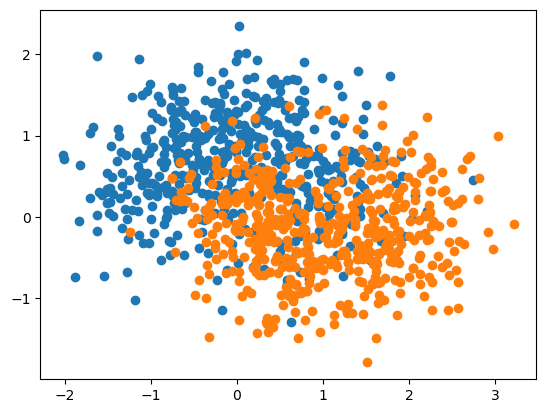

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Get Data Set
X, y = make_moons(n_samples=1000, noise=.5, random_state=0)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=123,shuffle=True,stratify=y)


In [59]:
from sklearn.tree import DecisionTreeClassifier

# Define Algorithm 
tree = DecisionTreeClassifier(random_state=123)


In [60]:
from mlxtend.evaluate import bias_variance_decomp
# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(tree, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

Average Expected Loss: 0.2487n
Average Bias: 0.2467
Average Variance: 0.13


The `mlxtend` library is used here, for more detail:http://rasbt.github.io/mlxtend/
> Note: Install `mlxtend` library with PIP before use.

In [61]:
from sklearn.metrics import accuracy_score
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7333333333333333

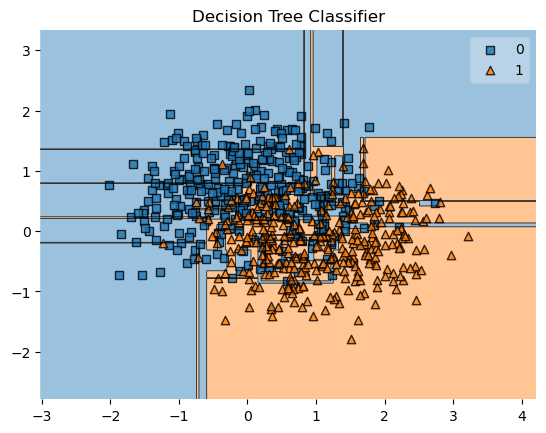

In [62]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train, clf=tree)	
plt.title('Decision Tree Classifier')	
plt.show()	



### Bagging example

## Ensemble learning
The Decision Tree is among the most fundamental but widely-used machine learning algorithms. However, one tree alone is usually not the best choice of data practitioners, especially when the model performance is highly regarded. Instead, an ensemble of trees would be of more interest. By combining individual models, the ensemble model tends to be more flexible🤸‍♀️ (less bias) and less data-sensitive🧘‍♀️ (less variance).

Two most popular ensemble methods are bagging and boosting.
- **Bagging:** Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data
- **Boosting:** Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.

<img src="images/bagging-boosting.png" alt="img " style="zoom:100%;" />

With a basic understanding of what ensemble learning is, let’s grow some “trees” 🎄.

The following content will cover step by step explanation on Random Forest, AdaBoost, and Gradient Boosting, and their implementation in Python Sklearn.

 

### Random Forest

Random forest is an ensemble model using bagging as the ensemble method and decision tree as the individual model.

Let’s take a closer look at **the magic🔮 of the randomness**:

<img src="images/randomforest.png" alt="img " style="zoom:100%;" />

Step 1: **Select n (e.g. 1000) random subsets** from the training set

Step 2: **Train n (e.g. 1000) decision trees**

- one random subset is used to train one decision tree
- the optimal splits for each decision tree are based on a random subset of samples  or features (e.g. 10 features in total, randomly select 5 out of 10 features to split)

Step 3: **Each individual tree predicts** the records in the test set, independently.

Step 4: **Make the final prediction**

For each candidate in the test set, Random Forest uses the class (e.g. cat or dog) with the **majority vote** as this candidate’s final prediction.

Of course, our 1000 trees are the parliament here.



#### Random Forest example

In [63]:
from sklearn.ensemble  import RandomForestClassifier

# Define Algorithm 
# Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.7933333333333333

In [64]:
from mlxtend.evaluate import bias_variance_decomp
# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

Average Expected Loss: 0.207n
Average Bias: 0.2033
Average Variance: 0.0757


#### Bagging example

In [66]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

# Define Algorithm 
tree = DecisionTreeClassifier(random_state=123)
bag = BaggingClassifier(base_estimator=tree,n_estimators=100,random_state=123)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

0.7866666666666666

In [67]:


# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(bag, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

Average Expected Loss: 0.2257n
Average Bias: 0.23
Average Variance: 0.0883


### AdaBoost (Adaptive Boosting)

AdaBoost is a boosting ensemble model and works especially well with the decision tree. Boosting model’s key is learning from the previous mistakes, e.g. misclassification data points.

AdaBoost learns from the mistakes by increasing the weight of misclassified data points.

Let’s illustrate **how AdaBoost adapts**.

![img](images/adaboost.png)

- Step 0: **Initialize the weights** of data points. if the training set has 100 data points, then each point’s initial weight should be 1/100 = 0.01.

- Step 1: **Train** a decision tree

- Step 2: **Calculate the weighted error rate (e)** of the decision tree. **The weighted error rate (e)** is just how many wrong predictions out of total and you treat the wrong predictions differently based on its data point’s weight. **The higher the weight**, **the more the corresponding error will be weighted** during the calculation of the (e).

- Step 3: **Calculate this decision tree’s weight** in the ensemble. The weight of this tree = `learning rate * log( (1 — e) / e)`

  - the higher weighted error rate of a tree, 😫, the less decision power the tree will be given during the later voting

  - the lower weighted error rate of a tree, 😃, the higher decision power the tree will be given during the later voting

- Step 4: **Update weights** of wrongly classified points. The weight of each data point :

  - if the model got this data point correct, the weight stays the same

  - if the model got this data point wrong, the new weight of this point = old weight * np.exp(weight of this tree)

    

>  **Note**: The higher the weight of the tree (more accurate this tree performs), the more boost (importance) the misclassified data point by this tree will get. The weights of the data points are normalized after all the misclassified points are updated.



- Step 5: **Repeat** Step 1(until the number of trees we set to train is reached)
- Step 6: **Make the final prediction**

The AdaBoost makes a new prediction by adding up the weight (of each tree) multiply the prediction (of each tree). Obviously, the tree with higher weight will have more power of influence the final decision.

![img](images/adaboot2.png)



#### AdaBoost example

In [34]:
from sklearn.ensemble  import AdaBoostClassifier

#  Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.8133333333333334

In [35]:
from mlxtend.evaluate import bias_variance_decomp
# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

Average Expected Loss: 0.2063n
Average Bias: 0.1933
Average Variance: 0.0763


### Gradient Boosting

Gradient boosting is another boosting model. Remember, boosting model’s key is learning from the previous mistakes.

Gradient Boosting learns from the mistake — residual error directly, rather than update the weights of data points.

Let’s illustrate **how Gradient Boost learns.**

![img](images/gradient-boost.png)

- Step 1: T**rain** a decision tree
- Step 2: **Apply** the decision tree just trained to predict
- Step 3: **Calculate** the residual of this decision tree, Save residual errors as the new y
- Step 4: **Repeat** Step 1 (until the number of trees we set to train is reached)
- Step 5: **Make the final prediction**

The Gradient Boosting makes a new prediction by simply adding up the predictions (of all trees).

![img](images/gradient-boost2.png)

#### Gradient boosting example


In [36]:
from sklearn.ensemble  import GradientBoostingClassifier

#  Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.8033333333333333

In [37]:
from mlxtend.evaluate import bias_variance_decomp
# Get Bias and Variance - bias_variance_decomp function
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf, X_train, y_train, X_test, y_test, loss='0-1_loss',random_seed=123,num_rounds=10)
# Display Bias and Variance
print(f'Average Expected Loss: {round(avg_expected_loss, 4)}n')
print(f'Average Bias: {round(avg_bias, 4)}')
print(f'Average Variance: {round(avg_var, 4)}')

Average Expected Loss: 0.1957n
Average Bias: 0.1833
Average Variance: 0.0657


### Rewrite the code to make it easier to compare

In [38]:
# Load Library
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [39]:
# Step1: Create data set
X, y = make_moons(n_samples=10000, noise=.5, random_state=0)


In [40]:
# Step2: Split the training test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
# Step 3: Fit a Decision Tree model as comparison
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.756


0.7525

In [42]:
# Step 4: Fit a Random Forest model, " compared to "Decision Tree model, accuracy go up by 5%
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT: 0.797


0.7965

In [43]:
# Step 5: Fit a AdaBoost model, " compared to "Decision Tree model, accuracy go up by 10%
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT:0.833


0.833

In [44]:
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
#OUTPUT:0.834


0.8335

Note: Parameter - n_estimators stands for how many tree we want to grow

### Chosing between Bagging and Boosting
It depends on the data and also the base model that you choose. In general, if the single model has the issue of overfitting, bagging would be a better choice because it decreases the model variance. If the single model has low performance, you should consider boosting to boost up the accuracy.

## LAB Assignment  
This lab introduces classical machine learning algorithms, decision trees (DTs) and their ensemble learning (e.g., Random Forests). Decision trees are important non-parameter learning methods. Although DTs are simple and limited, they still can achieve excellent performance using ensemble learning schemes.

For this lab assignment, we'll use the algorithms we've learned today to fit the model and evaluate the model’s prediction performance. The scikit-learn package will be used to save your time.


### 4.1 Learn to use decision trees
#### step 1. load iris dataset 
**Datasets**: First, we load the scikit-learn iris toy dataset .

In [68]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()

#### step 2. Define the features and the target

In [ ]:
X = iris.data[:,2:]
y = iris.target

#### step 3. Visualization
We need to use proper visualization methods to have an intuitive understanding.

For visualization, only the last 2 attributes are used.


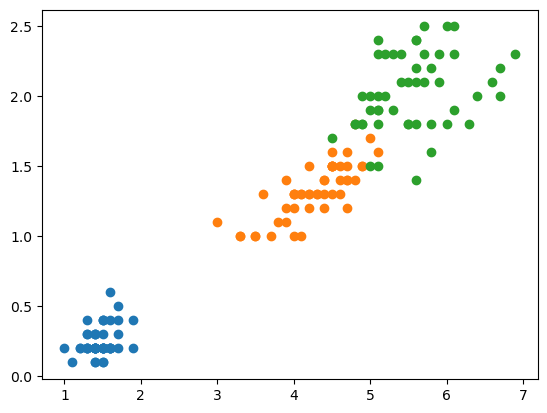

In [69]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [ ]:
########### Write Your Code Here ###########

############################################

#### step 4. Preprocessing data
Please check whether the data needs to be preprocessed

In [ ]:
########### Write Your Code Here ###########

############################################

#### step 5. Split the dataset into train and test sets
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [ ]:
########### Write Your Code Here ###########

############################################

#### step 6. Model selection
For classification, we have many models to choose from. Please don't just pick a model to train and say it's good enough. We need to choose a good model based on some indicators.

For today's lab, I recommend choosing between decision trees and various ensemble learning models (including Random Forest, Adaboost, Gradient Boostiing, etc.).
- Select model using cross validation. Compare the score in the training set and the validation set. If they are good enough, use the model in the test set.
- Calculate the bias and variance of each model to further analyze your chosen model.


In [ ]:
########### Write Your Code Here ###########

############################################

#### step 7. Use the model of your choice on the test set


In [ ]:
########### Write Your Code Here ###########

############################################

#### step 8. Evaluate the model

In [ ]:
########### Write Your Code Here ###########

############################################

#### step 9. Visual decision boundary

In [ ]:
########### Write Your Code Here ###########

############################################

**Problem:** Decision trees are quite easy to use, but they are prone to overfit the training data. Actually almost all the non-parameter learning methods suffer from this problem. We can use pruning to optimize our trained decision trees; we can also adjust the super parameters to avoid overfitting.

<font size='3' color='red'> 
Exercise 01:
    
When we create a decision tree dt_clf, we only use two arguments. Actually, there are so many arguments and they are all helpful in adjusting the algorithm parameters to achieve the balance between bias and variance. Please describe the meaning of each argument and explain how it affects the classification result in terms of bias and variance.
</font>

#### 3. Random forest
In Lab05_DecisionTree.pdf we have introduced that a RF can be constructed through bagging and decision trees. Thus, in scikit-learn, there are two ways to implement an RF, from the Bagging view and from the RF view. First, we create a random dataset.

In [76]:
# Create random dataset
X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

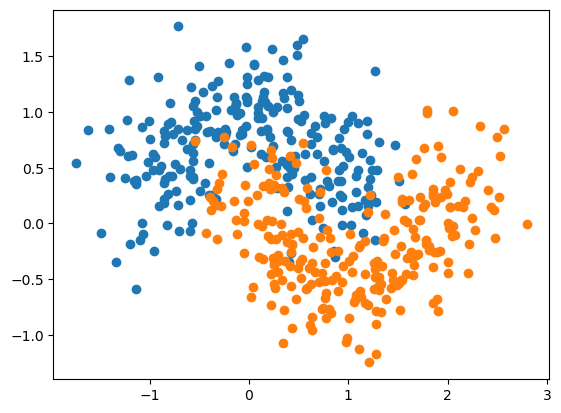

In [77]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

<font color=black face=雅黑>**Bagging view:**</font> we use the bagging algorithm with a number of base learning algorithms of decision trees.

In [78]:
# Use Random Forest from Bagging view

from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=300,
                                max_samples=300,
                                bootstrap=True, # using bootstrap sampling method
                                oob_score=True, # use oob data for scoring
                                # n_jobs=-1 # use paralell computing
                               )
bagging_clf.fit(X,y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=300,
                  n_estimators=300, oob_score=True)

Because we use oob_score (out-of-bag data for score), so we do not need a separated testing set.

In [79]:
# Output oob score
bagging_clf.oob_score_

0.91

See the result.

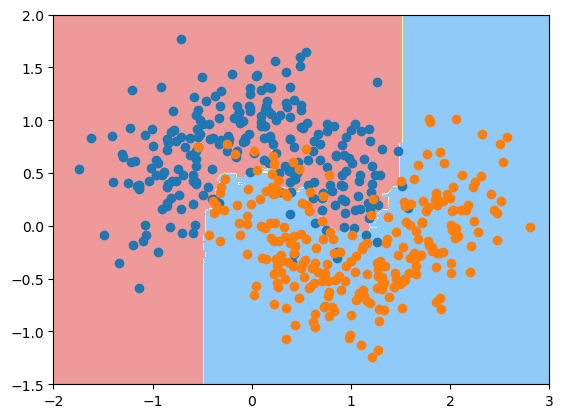

In [80]:
plot_decision_boundary(bagging_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

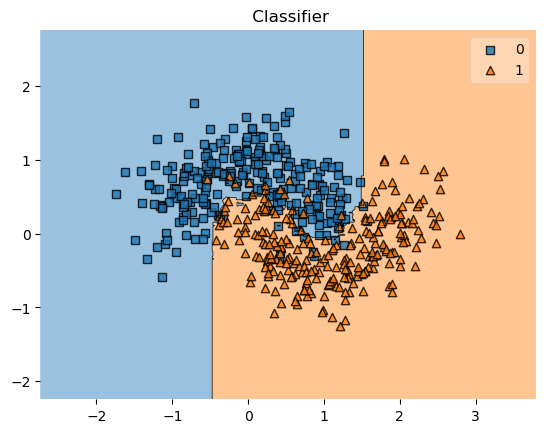

In [82]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, y, clf=bagging_clf)	
plt.title(' Classifier')	
plt.show()	

<font color=black face=雅黑>**RF view:**</font> we construct a RF class directly.

In [81]:
# Use Random Forest directly

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300,
                                random_state=666, # random attributes subset
                                oob_score=True,
                                # n_jobs=-1
                               )
rf_clf.fit(X,y)

RandomForestClassifier(n_estimators=300, oob_score=True, random_state=666)

There are many arguments for either base decision trees or the whole ensemble algorithm. A good ensemble algorithm should make sure that base ones are both accurate and diversified. So it is better to get a set of good enough base tree parameters before training the ensemble learning algorithm. Than we see the results.

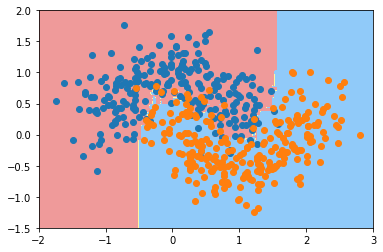

In [21]:
plot_decision_boundary(rf_clf, axis=[-2, 3, -1.5, 2])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

<font size='3' color='red'> 
Exercise 02:
    
Explain the meaning of the arguments of BaggingClassifier( ) and RandomForestClassifier( ) respectively, compare the performances of two construction methods, and discuss the classification results in terms of bias and variance by choosing different argument values.
</font>

### Questions:
(1) Can decision trees and random forests be used for unsupervised clustering or data dimension reduction? Why?

(2) What are the strengths of the decision tree/random forest methods; when do they perform well?

(3) What are the weaknesses of the decision tree/random forest methods; when do they perform poorly?

(4) What makes the decision tree/random forest a good candidate for the classification/regression problem, if you have enough knowledge about the data?

## Conclusion
- Decision trees are prone to overfitting, but random forest algorithm prevents overfitting.
- Random forest algorithm is comparatively time-consuming, whereas decision tree algorithm gives fast results.


## References
https://scikit-learn.org/stable/